Этот набор данных с сайта kaggle: https://www.kaggle.com/gauthamp10/google-playstore-apps.Я решил поучаствовать в анализе данных данного датасета.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('windows_store.csv')
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


Рассмотрим структуру данных

In [3]:
df.shape

(5322, 6)

In [4]:
df.dtypes

Name                   object
Rating                float64
No of people Rated      int64
Category               object
Date                   object
Price                  object
dtype: object

In [5]:
df.describe()

,Rating,No of people Rated
count,5321.000000,5322.000000
mean,3.792708,551.873168
std,0.991681,259.820088
min,1.000000,100.000000
25%,3.500000,327.000000
50%,4.000000,548.000000
75%,4.500000,779.000000
max,5.000000,1000.000000


In [6]:
df.isnull().sum()

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64

In [9]:
df = df.dropna(axis=0)

In [10]:
df.isnull().sum()

Name                  0
Rating                0
No of people Rated    0
Category              0
Date                  0
Price                 0
dtype: int64

In [11]:
df.groupby('Name')[['Rating']].mean().sort_values('Rating', ascending = False)

,Rating
Name,
Q-Eye,5.0
Collibra for Desktop,5.0
Whitman Identifier,5.0
WhosNext,5.0
Kode Studio,5.0
...,...
Offline Documentation Browser,1.0
S News,1.0
Cabinet Paperless,1.0


In [12]:
df.groupby('Category')[['Rating']].mean().sort_values('Rating', ascending = False)

,Rating
Category,
Government and Politics,4.050000
Kids and Family,3.947826
Developer Tools,3.886000
Lifestyle,3.850610
Social,3.847561
News and Weather,3.837474
Navigation and Maps,3.801948
Books,3.791372
Food and Dining,3.789157


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Распределение рейтинговых оценок')

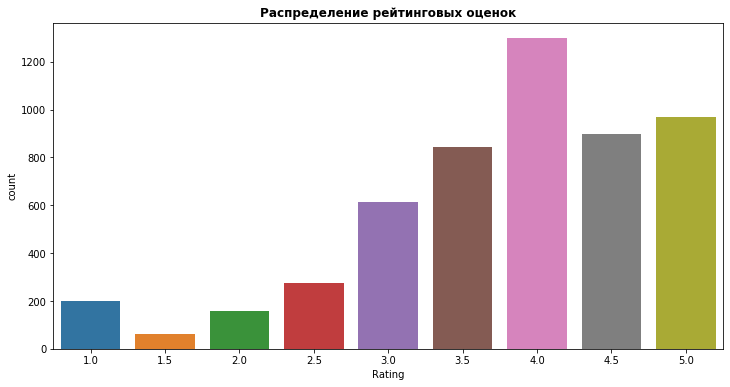

In [14]:
plt.subplots(figsize=(12,6))
sns.countplot(x=df["Rating"])
plt.title("Распределение рейтинговых оценок", fontweight="bold")

In [15]:
df.Category.value_counts()

Music                      753
Books                      707
Business                   679
Health and Fitness         527
Developer Tools            500
Lifestyle                  492
News and Weather           483
Kids and Family            345
Social                     328
Food and Dining            166
Navigation and Maps        154
Multimedia Design          117
Government and Politics     70
Name: Category, dtype: int64

Создаём фунакцию для очистки series "price", для дальнейшей обработки данных

In [16]:
def change_form_of_value(Value):
    change = Value.replace("₹", "")
    if "Free" in change:
        change = change.replace("Free","0")
    elif "," in change:
        change = change.replace(",","")
    return change

In [17]:
df

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,08-08-2019,₹ 54.50
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00


In [18]:
def change_form_of_value(Value):
    change = Value.replace("₹", "")
    if "Free" in change:
        change = change.replace("Free","0")
    elif "," in change:
        change = change.replace(",","")
    return change
df["Price"] = df["Price"].apply(lambda x: change_form_of_value(x))
df["Price"] = df["Price"].astype("float")

In [19]:
df.groupby('Category',as_index=False)[['Rating','Price']].mean().sort_values('Rating', ascending = False)

,Category,Rating,Price
4,Government and Politics,4.050000,0.000000
6,Kids and Family,3.947826,0.000000
2,Developer Tools,3.886000,45.772000
7,Lifestyle,3.850610,0.000000
12,Social,3.847561,0.000000
11,News and Weather,3.837474,0.000000
10,Navigation and Maps,3.801948,0.000000
0,Books,3.791372,23.845827
3,Food and Dining,3.789157,0.000000
5,Health and Fitness,3.785579,0.000000


In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek

In [24]:
df.head()

,Name,Rating,No of people Rated,Category,Date,Price,year,month,day,day_of_week
0,Dynamic Reader,3.5,268,Books,2014-07-01,0.0,2014,7,1,1
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,0.0,2014,8,1,4
2,BookViewer,3.5,593,Books,2016-02-29,0.0,2016,2,29,0
3,Brick Instructions,3.5,684,Books,2018-01-30,0.0,2018,1,30,1
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,0.0,2018,1,30,1


In [25]:
df_book=df[df['Category']=='Books']
df_business=df[df['Category']=='Business']
df_Developer=df[df['Category']=='Developer Tools']

Text(0, 0.5, 'Сумма')

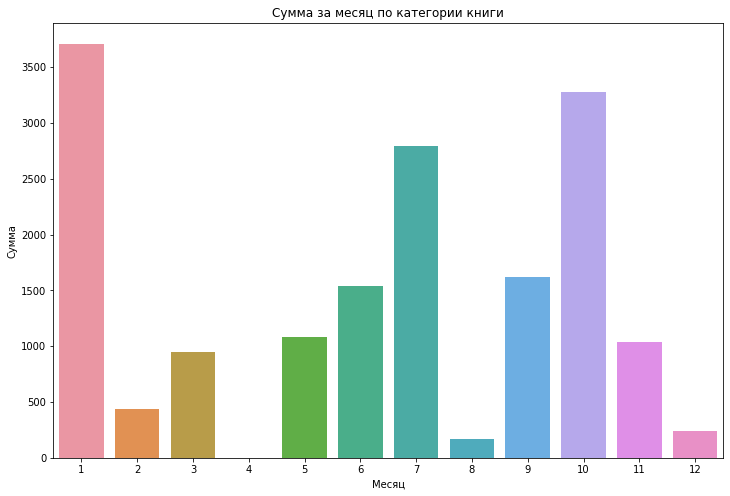

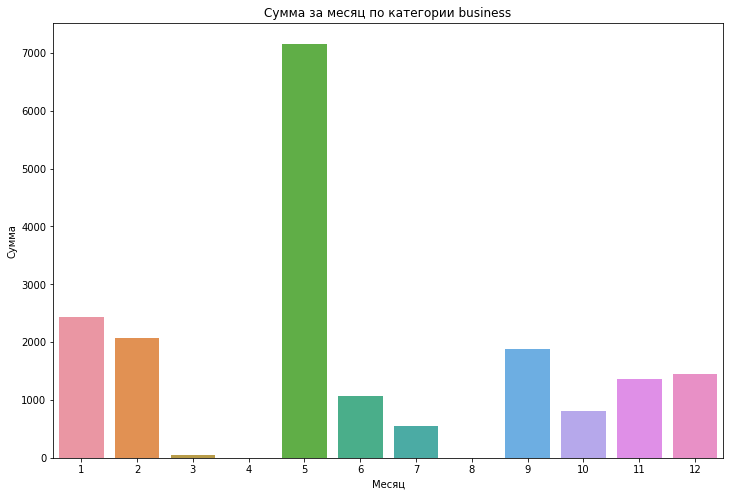

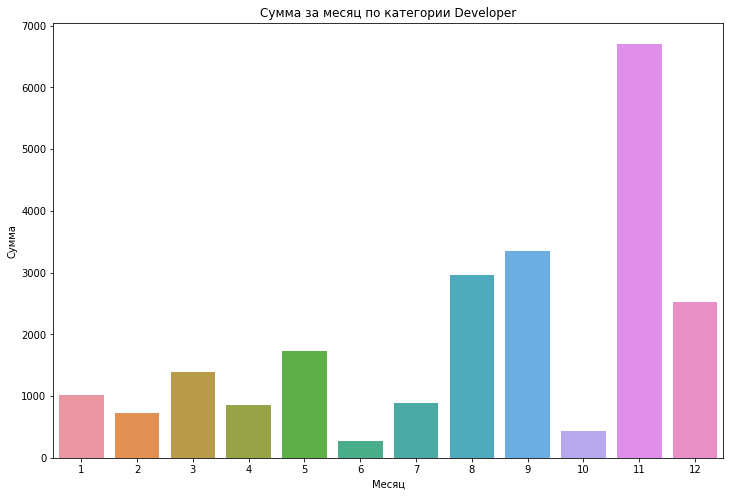

In [26]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df_book.groupby('month').Price.sum().index, 
                 y=df_book.groupby('month').Price.sum().values, data=df)
ax.set_title('Сумма за месяц по категории книги')
ax.set_xlabel('Месяц')
ax.set_ylabel('Сумма')

plt.figure(figsize=(12,8))
ax = sns.barplot(x=df_business.groupby('month').Price.sum().index, 
                 y=df_business.groupby('month').Price.sum().values, data=df)
ax.set_title('Сумма за месяц по категории business')
ax.set_xlabel('Месяц')
ax.set_ylabel('Сумма')



plt.figure(figsize=(12,8))
ax = sns.barplot(x=df_Developer.groupby('month').Price.sum().index, 
                 y=df_Developer.groupby('month').Price.sum().values, data=df)
ax.set_title('Сумма за месяц по категории Developer')
ax.set_xlabel('Месяц')
ax.set_ylabel('Сумма')

Text(0, 0.5, 'Сумма на день недели')

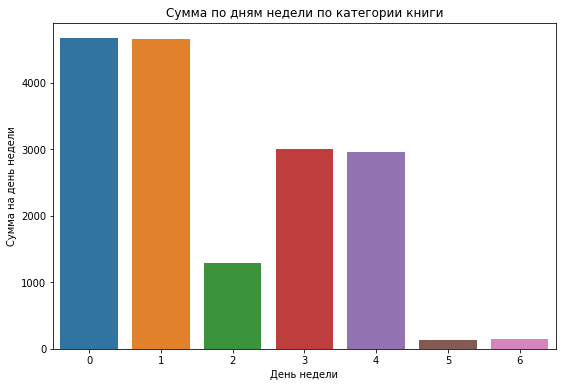

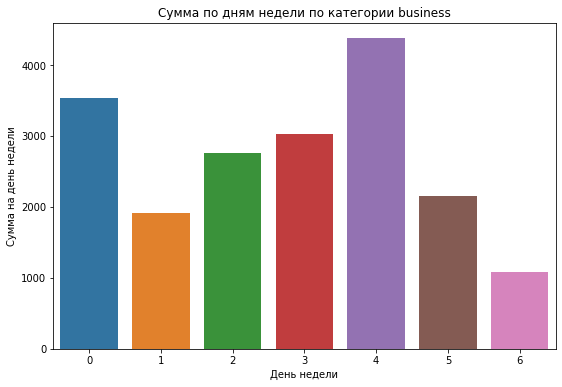

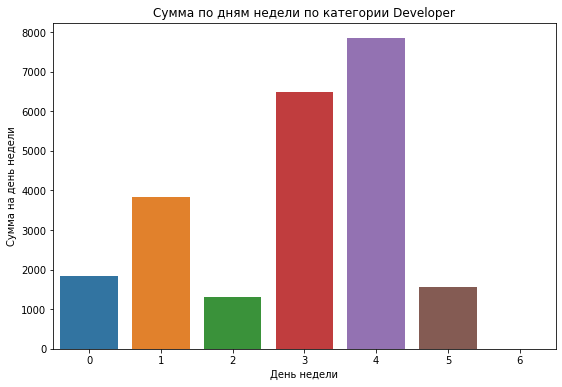

In [27]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x=df_book.groupby('day_of_week').Price.sum().index, 
                 y=df_book.groupby('day_of_week').Price.sum().values, data=df)
ax.set_title('Сумма по дням недели по категории книги')
ax.set_xlabel('День недели')
ax.set_ylabel('Сумма на день недели')

plt.figure(figsize=(9,6))
ax = sns.barplot(x=df_business.groupby('day_of_week').Price.sum().index, 
                 y=df_business.groupby('day_of_week').Price.sum().values, data=df)
ax.set_title('Сумма по дням недели по категории business')
ax.set_xlabel('День недели')
ax.set_ylabel('Сумма на день недели')



plt.figure(figsize=(9,6))
ax = sns.barplot(x=df_Developer.groupby('day_of_week').Price.sum().index, 
                 y=df_Developer.groupby('day_of_week').Price.sum().values, data=df)
ax.set_title('Сумма по дням недели по категории Developer')
ax.set_xlabel('День недели')
ax.set_ylabel('Сумма на день недели')

Text(0, 0.5, 'Сумма')

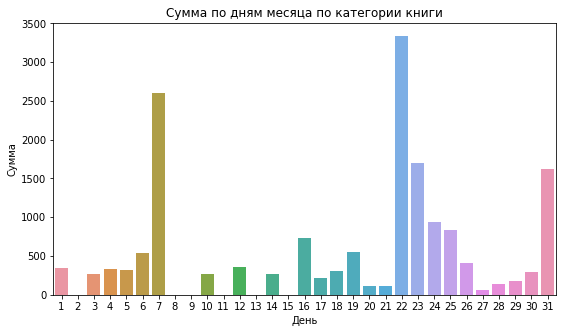

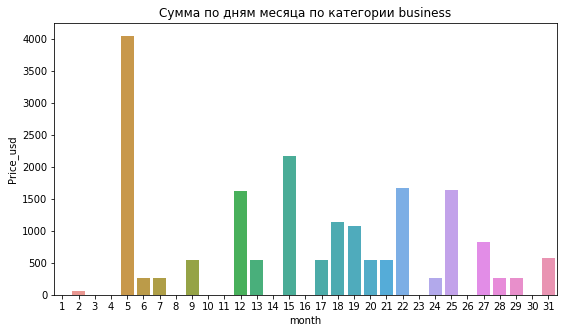

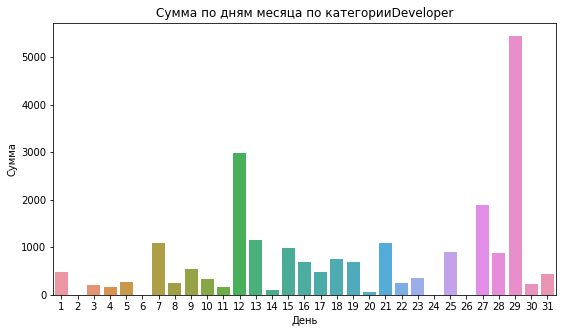

In [28]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x=df_book.groupby('day').Price.sum().index, 
                 y=df_book.groupby('day').Price.sum().values, data=df)
ax.set_title('Сумма по дням месяца по категории книги')
ax.set_xlabel('День')
ax.set_ylabel('Сумма')

plt.figure(figsize=(9,5))
ax = sns.barplot(x=df_business.groupby('day').Price.sum().index, 
                 y=df_business.groupby('day').Price.sum().values, data=df)
ax.set_title('Сумма по дням месяца по категории business')
ax.set_xlabel('month')
ax.set_ylabel('Price_usd')



plt.figure(figsize=(9,5))
ax = sns.barplot(x=df_Developer.groupby('day').Price.sum().index, 
                 y=df_Developer.groupby('day').Price.sum().values, data=df)
ax.set_title('Сумма по дням месяца по категорииDeveloper')
ax.set_xlabel('День')
ax.set_ylabel('Сумма')

Text(0.5, 1.0, 'Выявление самых популырных категорий приложений')

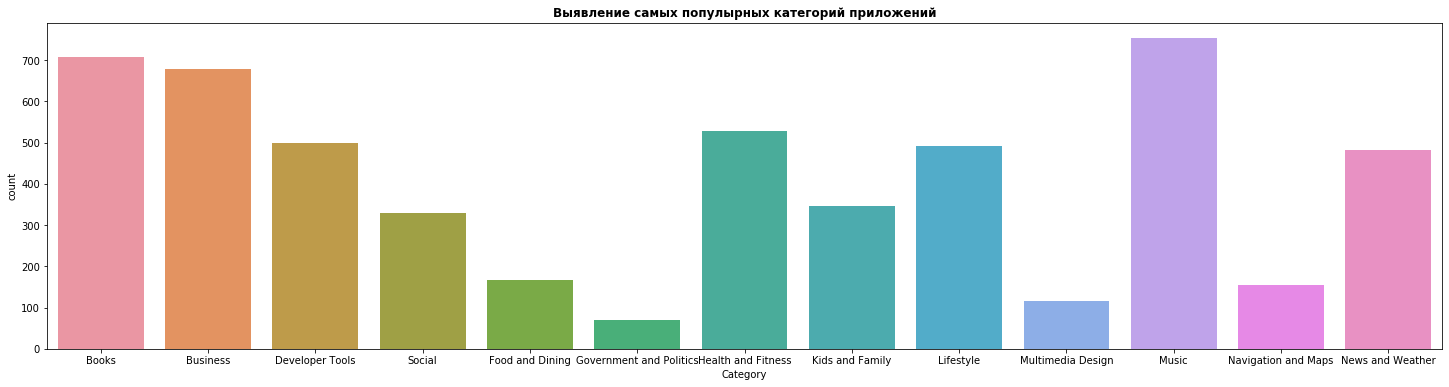

In [29]:
plt.subplots(figsize=(25,6))
sns.countplot(x=df["Category"])
plt.title("Выявление самых популырных категорий приложений", fontweight="bold")

Text(0, 0.5, 'Сумма')

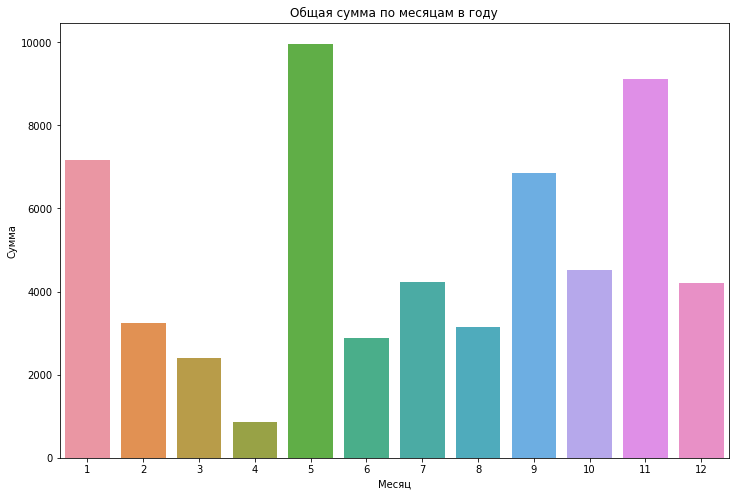

In [30]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('month').Price.sum().index, 
                 y=df.groupby('month').Price.sum().values, data=df)
ax.set_title('Общая сумма по месяцам в году')
ax.set_xlabel('Месяц')
ax.set_ylabel('Сумма')

Text(0, 0.5, 'Сумма')

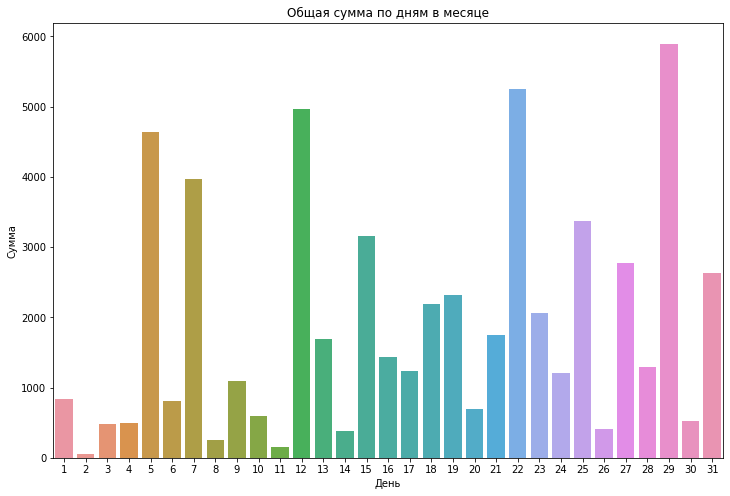

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('day').Price.sum().index, 
                 y=df.groupby('day').Price.sum().values, data=df)
ax.set_title('Общая сумма по дням в месяце')
ax.set_xlabel('День')
ax.set_ylabel('Сумма')

Text(0, 0.5, 'Сумма')

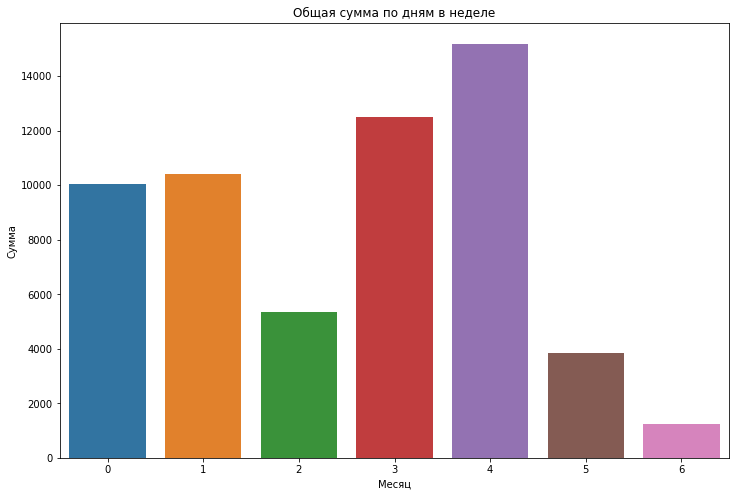

In [32]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('day_of_week').Price.sum().index, 
                 y=df.groupby('day_of_week').Price.sum().values, data=df)
ax.set_title('Общая сумма по дням в неделе')
ax.set_xlabel('Месяц')
ax.set_ylabel('Сумма')

In [33]:
def paid_books(category_name):
    plt.subplots(figsize=(10,20))
    a = df[(df["Category"] == category_name) & (df["Price"] != 0.0)]
    sns.barplot(x=a["Price"], y=a["Name"])
    plt.title(f"Распределение дохода по категории: {category_name}")

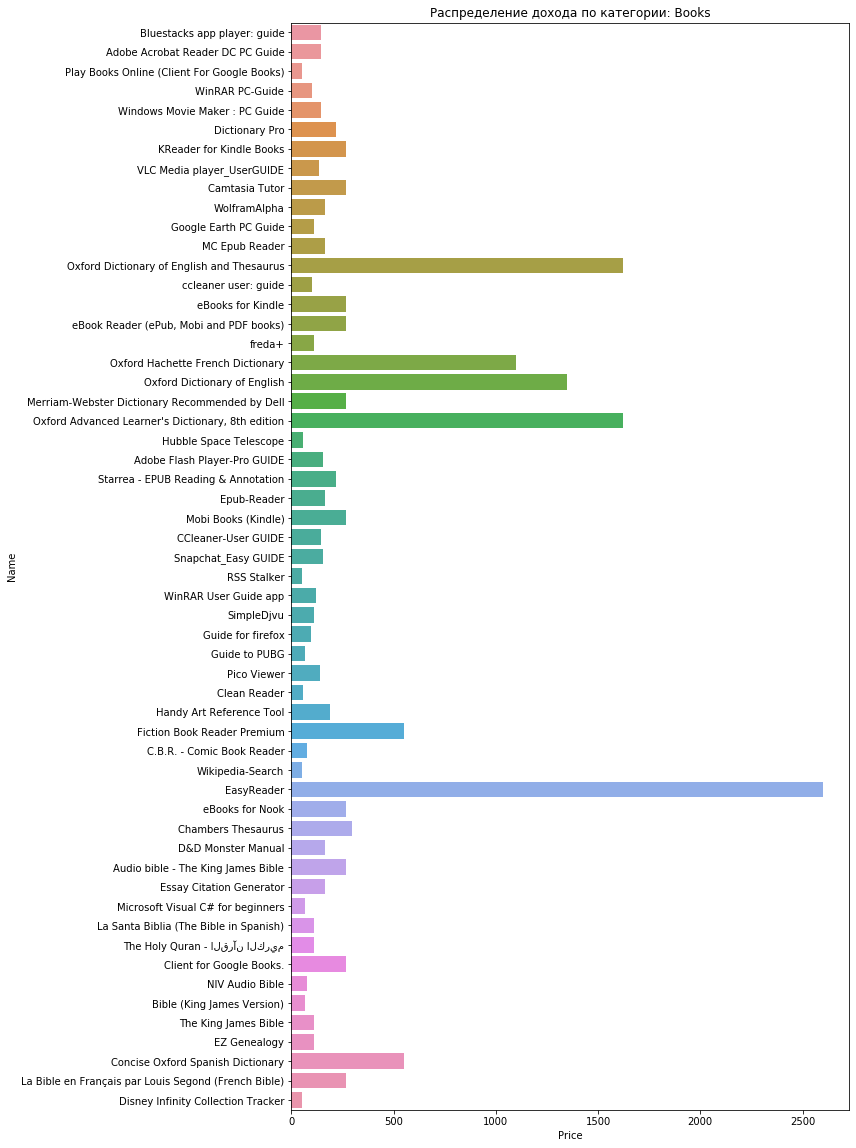

In [34]:
paid_books("Books")

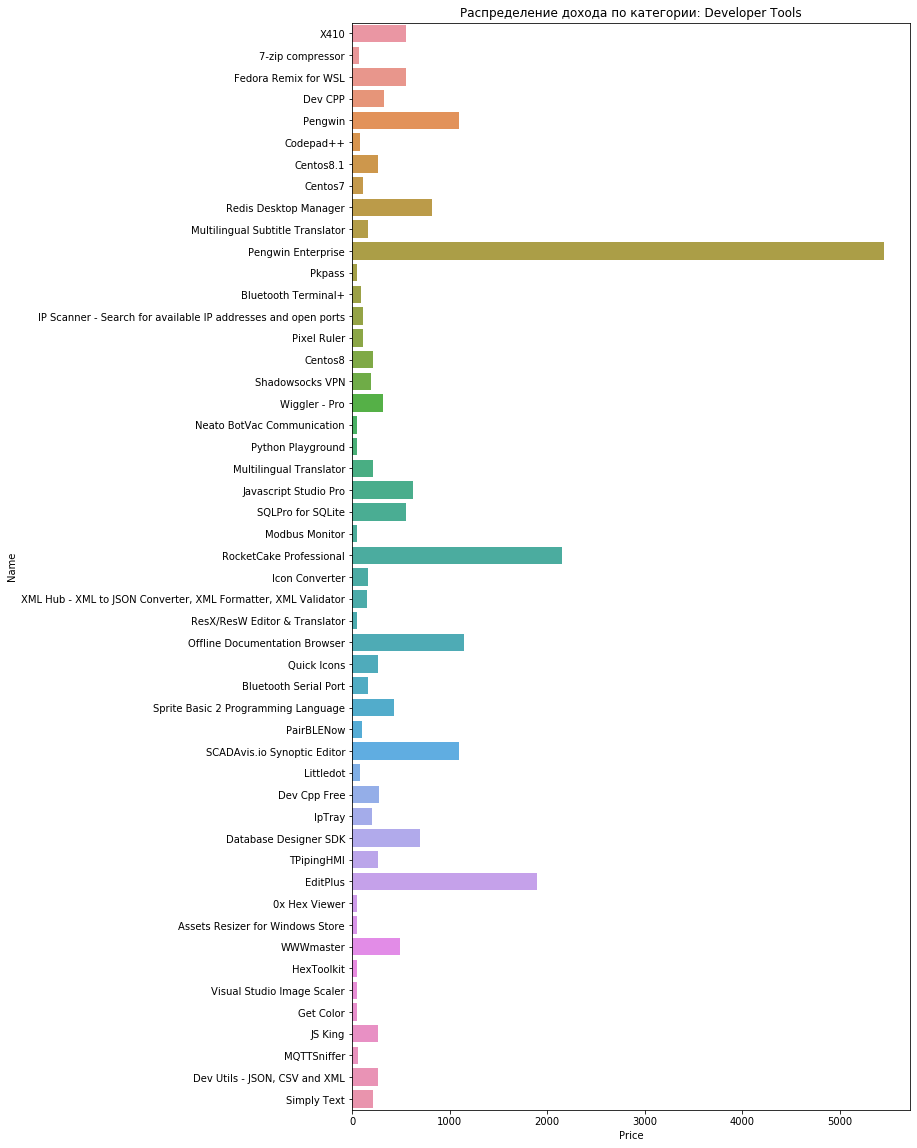

In [35]:
paid_books("Developer Tools")

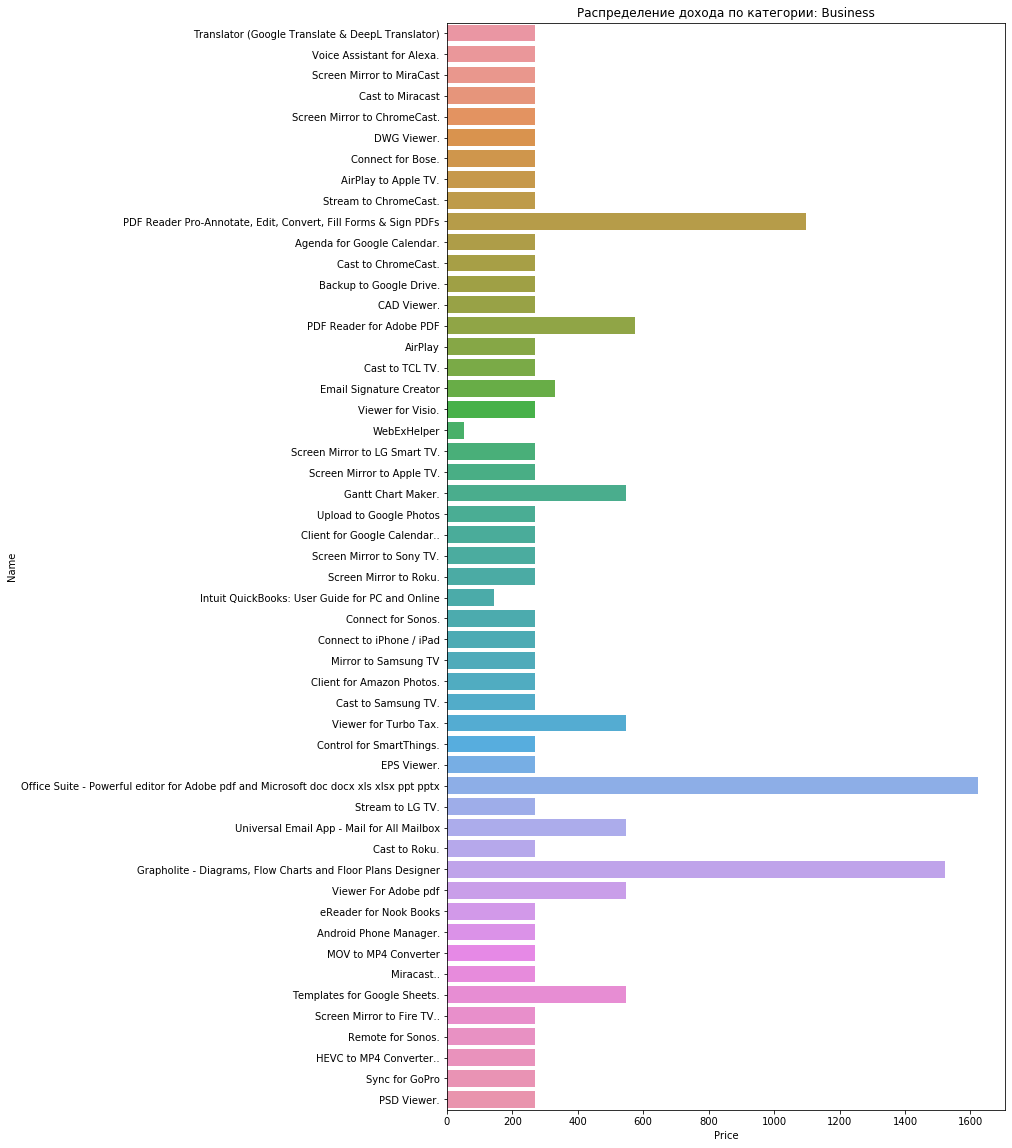

In [36]:
paid_books("Business")

In [38]:
df_percentage = df.loc[df["Price"] == 0.0]
total_free_app = len(df_percentage)
total_free_app_percentage = (df_percentage["Category"].value_counts() / total_free_app) * 100
total_free_app_percentage

Music                      14.584544
Books                      12.608948
Business                   12.144102
Health and Fitness         10.207244
Lifestyle                   9.529343
News and Weather            9.355026
Developer Tools             8.715863
Kids and Family             6.682162
Social                      6.352896
Food and Dining             3.215185
Navigation and Maps         2.982762
Multimedia Design           2.266124
Government and Politics     1.355801
Name: Category, dtype: float64

In [40]:
df.pivot_table(index='Category', columns='Rating', aggfunc={'Category':'count'}).reset_index()

Category                                              \
Rating                            1.0   1.5   2.0   2.5   3.0    3.5    4.0   
0                         Books  31.0  11.0  27.0  37.0  78.0  105.0  137.0   
1                      Business  66.0  10.0  13.0  44.0  75.0  118.0  134.0   
2               Developer Tools  23.0   8.0  19.0  32.0  41.0   58.0   88.0   
3               Food and Dining   6.0   2.0   2.0  10.0  25.0   25.0   41.0   
4       Government and Politics   1.0   1.0   1.0   NaN   8.0   10.0   20.0   
5            Health and Fitness  17.0   7.0  23.0  26.0  69.0   73.0  128.0   
6               Kids and Family   5.0   1.0   8.0  12.0  27.0   50.0  117.0   
7                     Lifestyle   7.0   3.0  15.0  30.0  59.0   83.0  118.0   
8             Multimedia Design   3.0   3.0   7.0   7.0  24.0   18.0   26.0   
9                         Music  17.0   9.0  21.0  38.0  96.0  132.0  219.0   
10          Navigation and Maps   5.0   1.0   3.0   9.0  21.0   28.0   34.0   
11             News and Weather  12.0   4.0   9.0  15.0  58.0   85.0  150.0   
12                       Social   8.0   2.0   8.0  16.0  34.0   59.0   87.0   

                      
Rating    4.5    5.0  
0       136.0  145.0  
1        80.0  139.0  
2        86.0  145.0  
3        21.0   34.0  
4        10.0   19.0  
5        76.0  108.0  
6        79.0   46.0  
7        93.0   84.0  
8        15.0   14.0  
9       135.0   86.0  
10       23.0   30.0  
11       83.0   67.0  
12       63.0   51.0

Из сводной таблицы можно увидеть, чем выше рейтинг у товара в категории, тем больше его приобретают